# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

In [1]:
##run this cell to use the notebook

##it imports the modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math
from math import pi


#and defines important methods

def f2plot(file,cat,pts):
    #this function takes a file and turns it into a
    #given matrix for plotting reasons
    table=np.zeros([cat,pts])
    lines=file.readlines()
    c=0
    for line in lines:
        line = line.replace("\n","")
        data = line.split(' ')
        for i in range(len(data)):
            table[i][c] = float(data[i])
        c += 1
    file.close()
    return table

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

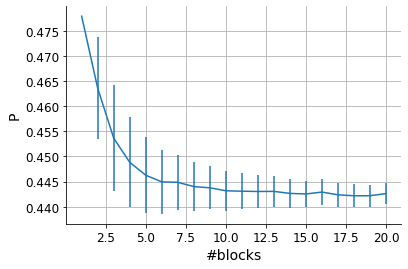

In [2]:
N=20
M=10000
L=int(M/N)
f=open("press.dat","r")
data=f2plot(f,4,N)

#let's plot!
plt.errorbar(data[0],data[2],yerr=data[3])
plt.xlabel('#blocks')
plt.ylabel('P')
plt.grid(True)
plt.show()

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

Each simulation  <span style="color:red">is performed after equilibration</span>

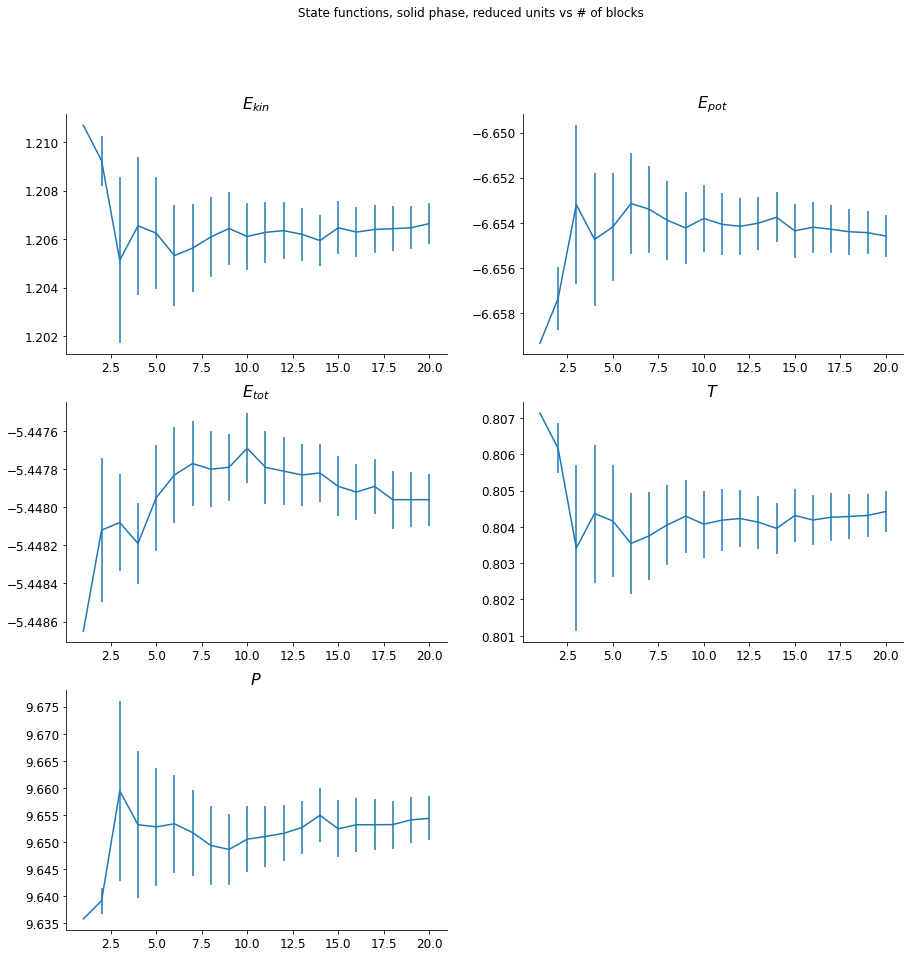

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('State functions, solid phase, reduced units vs # of blocks')
f=open("solid/output_ekin.dat","r")
data=f2plot(f,4,20)
ax[0,0].errorbar(data[0],data[2],yerr=data[3])
ax[0,0].set_title("$E_{kin}$")
f=open("solid/output_epot.dat","r")
data=f2plot(f,4,20)
ax[0,1].errorbar(data[0],data[2],yerr=data[3])
ax[0,1].set_title("$E_{pot}$")
f=open("solid/output_etot.dat","r")
data=f2plot(f,4,20)
ax[1,0].errorbar(data[0],data[2],yerr=data[3])
ax[1,0].set_title("$E_{tot}$")
f=open("solid/output_temp.dat","r")
data=f2plot(f,4,20)
ax[1,1].errorbar(data[0],data[2],yerr=data[3])
ax[1,1].set_title("$T$")
f=open("solid/output_pres.dat","r")
data=f2plot(f,4,20)
ax[2,0].errorbar(data[0],data[2],yerr=data[3])
ax[2,0].set_title("$P$")
ax[2,1].axis('off')
plt.show()

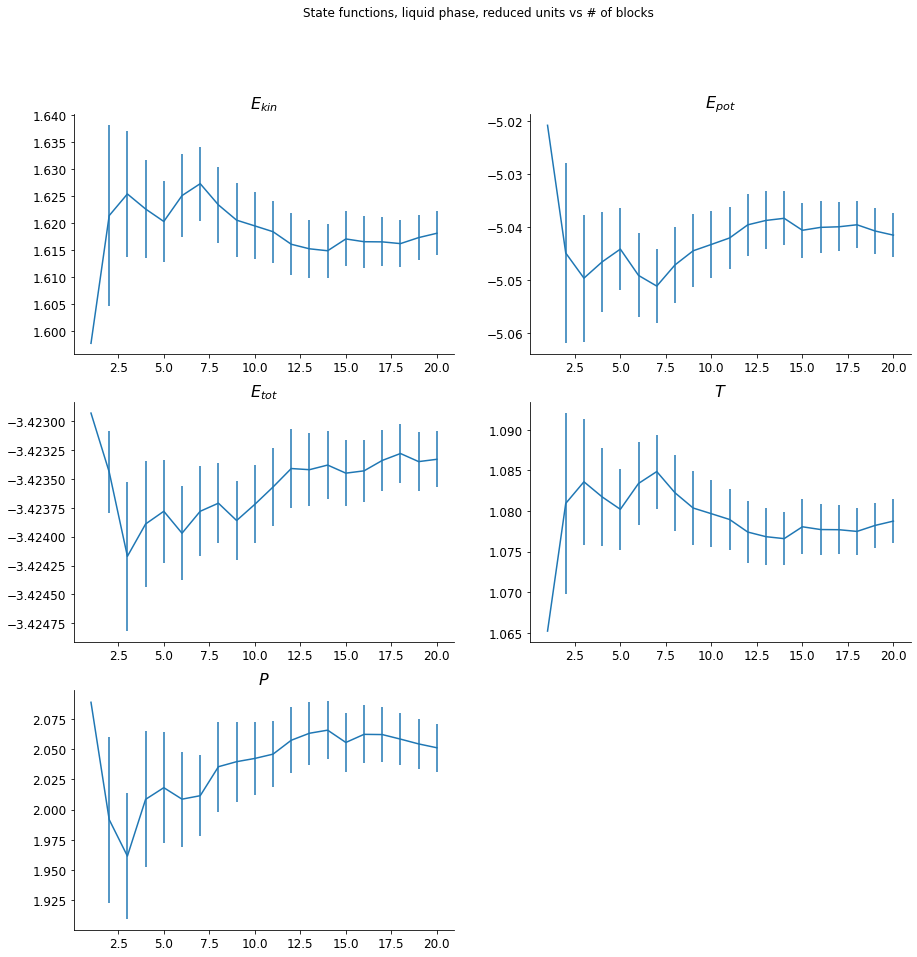

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('State functions, liquid phase, reduced units vs # of blocks')
f=open("liquid/output_ekin.dat","r")
data=f2plot(f,4,20)
ax[0,0].errorbar(data[0],data[2],yerr=data[3])
ax[0,0].set_title("$E_{kin}$")
f=open("liquid/output_epot.dat","r")
data=f2plot(f,4,20)
ax[0,1].errorbar(data[0],data[2],yerr=data[3])
ax[0,1].set_title("$E_{pot}$")
f=open("liquid/output_etot.dat","r")
data=f2plot(f,4,20)
ax[1,0].errorbar(data[0],data[2],yerr=data[3])
ax[1,0].set_title("$E_{tot}$")
f=open("liquid/output_temp.dat","r")
data=f2plot(f,4,20)
ax[1,1].errorbar(data[0],data[2],yerr=data[3])
ax[1,1].set_title("$T$")
f=open("liquid/output_pres.dat","r")
data=f2plot(f,4,20)
ax[2,0].errorbar(data[0],data[2],yerr=data[3])
ax[2,0].set_title("$P$")
ax[2,1].axis('off')
plt.show()

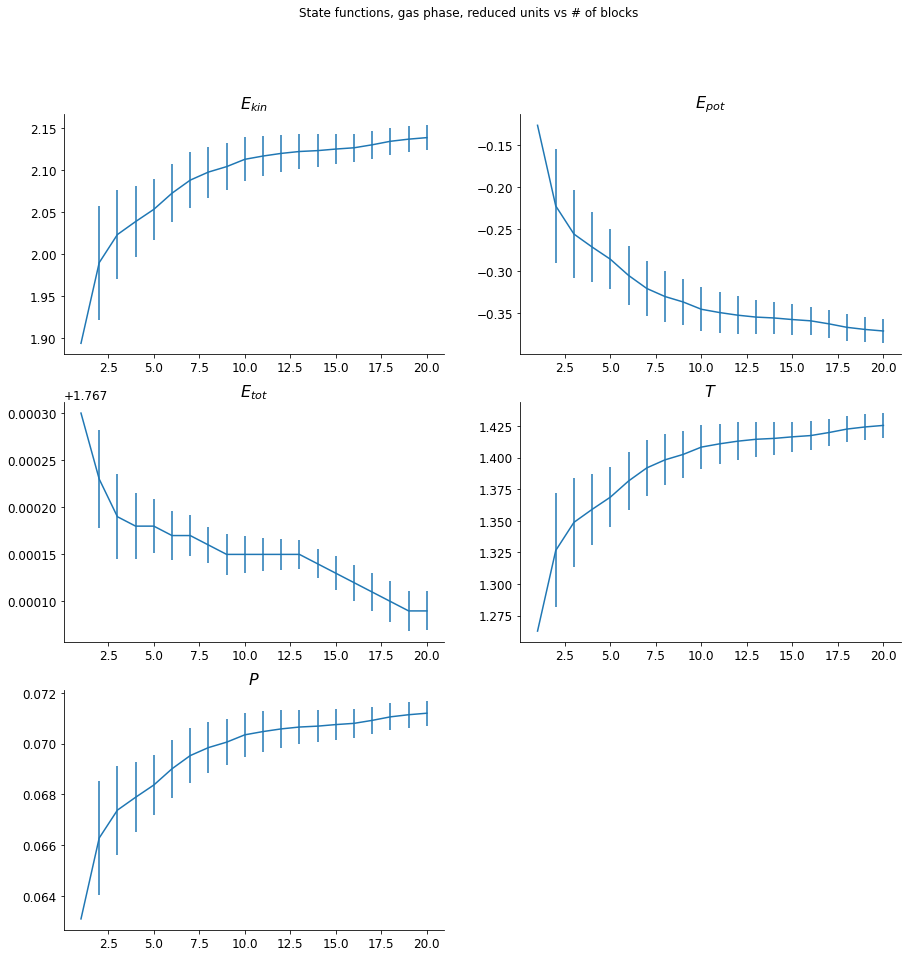

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('State functions, gas phase, reduced units vs # of blocks')
f=open("gas/ekin.dat","r")
data=f2plot(f,4,20)
ax[0,0].errorbar(data[0],data[2],yerr=data[3])
ax[0,0].set_title("$E_{kin}$")
f=open("gas/epot.dat","r")
data=f2plot(f,4,20)
ax[0,1].errorbar(data[0],data[2],yerr=data[3])
ax[0,1].set_title("$E_{pot}$")
f=open("gas/etot.dat","r")
data=f2plot(f,4,20)
ax[1,0].errorbar(data[0],data[2],yerr=data[3])
ax[1,0].set_title("$E_{tot}$")
f=open("gas/temp.dat","r")
data=f2plot(f,4,20)
ax[1,1].errorbar(data[0],data[2],yerr=data[3])
ax[1,1].set_title("$T$")
f=open("gas/pres.dat","r")
data=f2plot(f,4,20)
ax[2,0].errorbar(data[0],data[2],yerr=data[3])
ax[2,0].set_title("$P$")
ax[2,1].axis('off')
plt.show()

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

We experiment a little to find the suitable initial $T$ for the solid/liquid phase. $\newline$


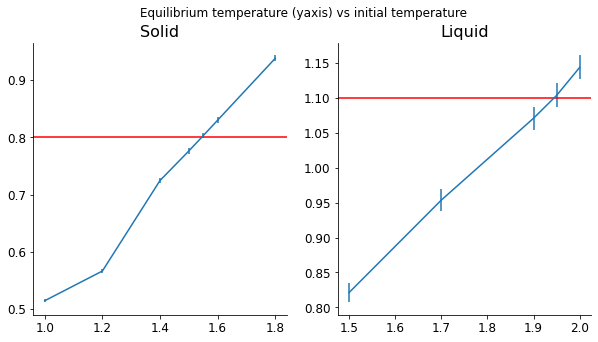

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Equilibrium temperature (yaxis) vs initial temperature')
f=open("equitempsolid.dat","r")
data=f2plot(f,3,7)
ax[0].errorbar(data[0],data[1],data[2])
ax[0].set_title('Solid')
ax[0].axhline(y = 0.8, color = 'r', linestyle = '-')
f=open("equitempliquid.dat","r")
data=f2plot(f,3,5)
ax[1].errorbar(data[0],data[1],data[2])
ax[1].set_title('Liquid')
ax[1].axhline(y = 1.1, color = 'r', linestyle = '-')

plt.show()

For the solid we use $T_i = 1.55$ which has $<T> = 0.803043$;

For the liquid we use $T_i = 1.95$ which has $<T> = 1.10335$;


We can highlight the process of equilibration by plotting $(T_i - <T>)^2$ where $<T>$ is the global average after a lot of steps.

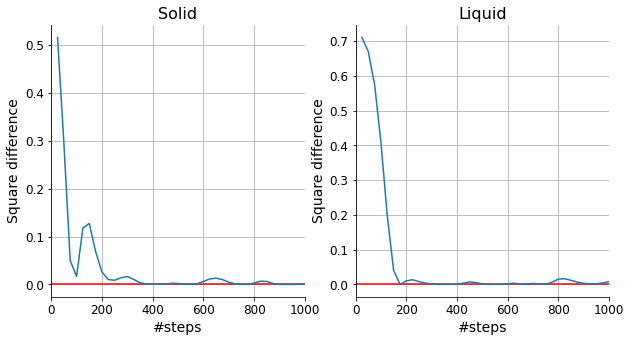

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

N=100
L=int(M/N)
f=open("equitemp.dat","r")
data=f2plot(f,4,N)

#let's plot!
ax[0].errorbar(data[0]*25,(data[1]-0.803043)**2.)
ax[0].set_title('Solid')
ax[0].set_xlabel('#steps')
ax[0].set_ylabel('Square difference')
ax[0].axhline(y = 0., color = 'r', linestyle = '-')
ax[0].set_xlim([0, 1000])
ax[0].grid(True)

f=open("equitemp2.dat","r")
data=f2plot(f,4,N)

#let's plot!
ax[1].errorbar(data[0]*25,(data[1]-1.10335)**2.)
ax[1].set_title('Liquid')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('Square difference')
ax[1].axhline(y = 0., color = 'r', linestyle = '-')
ax[1].set_xlim([0, 1000])
ax[1].grid(True)

plt.show()

We notice that after $\sim 400$ steps the fluctuation becomes negligible in both cases